In [1]:
import pandas as pd 

data = pd.read_csv('CC GENERAL.csv')
data.head()
# data.shape

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
data.isna().sum()
# data.value_counts()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
# data.fillna(method = 'ffill', inplace = True)
data.dropna(inplace = True)

In [4]:
nData = data.drop('CUST_ID', axis = 1)

In [5]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import numpy as np


scaler = StandardScaler()
scaledData = scaler.fit_transform(nData)

normData = normalize(scaledData)
normData = np.array(normData)
normData = pd.DataFrame(normData)

pca = PCA(n_components = 2)
Xprincipal = pca.fit_transform(normData)
Xprincipal = pd.DataFrame(Xprincipal)
Xprincipal.columns = ['P1', 'P2']
Xprincipal.head()


,P1,P2
0,-0.481788,-0.692991
1,-0.537375,0.527807
2,0.320760,0.265224
3,-0.562994,-0.503868
4,0.320512,-0.254469


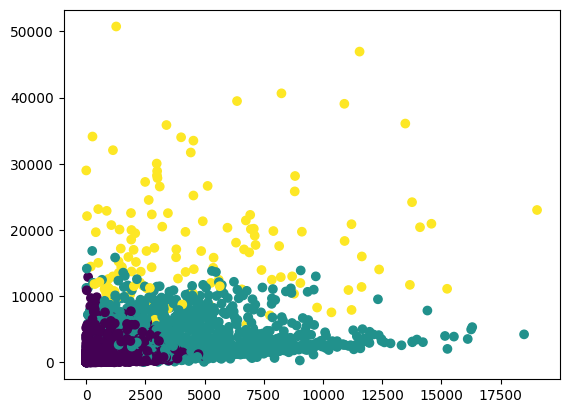

In [6]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters = 3, random_state = 40, n_init='auto')
kmeans.fit(nData)

plt.scatter(nData['BALANCE'], nData['PAYMENTS'], c = kmeans.labels_)

In [7]:
from sklearn.mixture import GaussianMixture

gaussMixure = GaussianMixture(n_components = 3)
gaussMixure.fit(Xprincipal)

GaussianMixture(n_components=3)

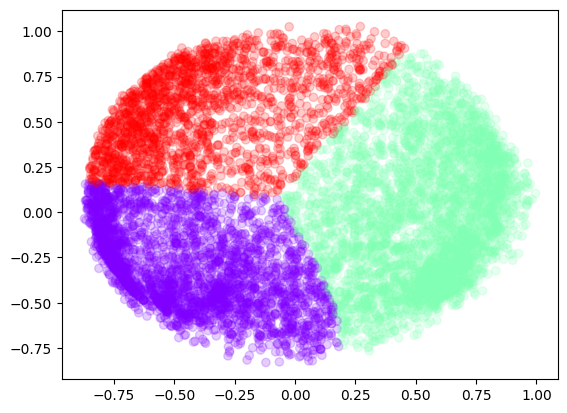

In [8]:

plt.scatter(Xprincipal['P1'], Xprincipal['P2'], c = gaussMixure.predict(Xprincipal),cmap = 'rainbow', alpha=0.2)


In [9]:
from sklearn.metrics import silhouette_score

def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]


n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(Xprincipal) 
        labels=gmm.predict(Xprincipal)
        sil=silhouette_score(Xprincipal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)


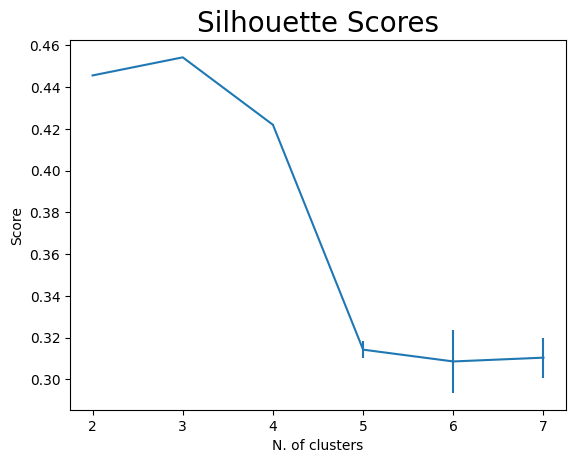

In [10]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.show()